In [1]:
import pywt
import matplotlib.pyplot as plt
import numpy as np
from pydicom import dcmread
import cv2 as cv
import scipy.fftpack as fftpack
import os
import operator
import zlib

In [2]:
a = pywt.families()

In [3]:
print(a)

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


In [4]:
for family in a:
    t = pywt.wavelist(family)
    for wave in t:
        print(pywt.Wavelet(wave))

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
Wavelet db1
  Family name:    Daubechies
  Short name:     db
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
Wavelet db2
  Family name:    Daubechies
  Short name:     db
  Filters length: 4
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
Wavelet db3
  Family name:    Daubechies
  Short name:     db
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
Wavelet db4
  Family name:    Daubechies
  Short name:     db
  Filters length: 8
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT: 

ValueError: The `Wavelet` class is for discrete wavelets, gaus1 is a continuous wavelet.  Use pywt.ContinuousWavelet instead

In [4]:
biortho = pywt.wavelist('bior')
for wave in biortho:
        print(pywt.Wavelet(wave))

Wavelet bior1.1
  Family name:    Biorthogonal
  Short name:     bior
  Filters length: 2
  Orthogonal:     False
  Biorthogonal:   True
  Symmetry:       symmetric
  DWT:            True
  CWT:            False
Wavelet bior1.3
  Family name:    Biorthogonal
  Short name:     bior
  Filters length: 6
  Orthogonal:     False
  Biorthogonal:   True
  Symmetry:       symmetric
  DWT:            True
  CWT:            False
Wavelet bior1.5
  Family name:    Biorthogonal
  Short name:     bior
  Filters length: 10
  Orthogonal:     False
  Biorthogonal:   True
  Symmetry:       symmetric
  DWT:            True
  CWT:            False
Wavelet bior2.2
  Family name:    Biorthogonal
  Short name:     bior
  Filters length: 6
  Orthogonal:     False
  Biorthogonal:   True
  Symmetry:       symmetric
  DWT:            True
  CWT:            False
Wavelet bior2.4
  Family name:    Biorthogonal
  Short name:     bior
  Filters length: 10
  Orthogonal:     False
  Biorthogonal:   True
  Symmetry:  

In [143]:
'''lut_u, lut_v = make_lut_u(), make_lut_v()
y_ = cv.cvtColor(y, cv.COLOR_GRAY2BGR)
u = cv.cvtColor(u, cv.COLOR_GRAY2BGR)
v = cv.cvtColor(v, cv.COLOR_GRAY2BGR)
u_mapped = cv.LUT(u, lut_u)
v_mapped = cv.LUT(v, lut_v)

print(u.shape, u_mapped.shape, v_mapped.shape)
result = np.vstack([imArray, y_, u_mapped, v_mapped])
print(y_)'''
#cv.imwrite(r"G:\Documents\img\ny2.jpg", result)
#cv.imwrite(r"G:\Documents\img\ny_y.jpg", y)
#cv.imwrite(r"G:\Documents\img\ny_u.jpg", u_mapped)
#cv.imwrite(r"G:\Documents\img\ny_v.jpg", v_mapped)



'lut_u, lut_v = make_lut_u(), make_lut_v()\ny_ = cv.cvtColor(y, cv.COLOR_GRAY2BGR)\nu = cv.cvtColor(u, cv.COLOR_GRAY2BGR)\nv = cv.cvtColor(v, cv.COLOR_GRAY2BGR)\nu_mapped = cv.LUT(u, lut_u)\nv_mapped = cv.LUT(v, lut_v)\n\nprint(u.shape, u_mapped.shape, v_mapped.shape)\nresult = np.vstack([imArray, y_, u_mapped, v_mapped])\nprint(y_)'

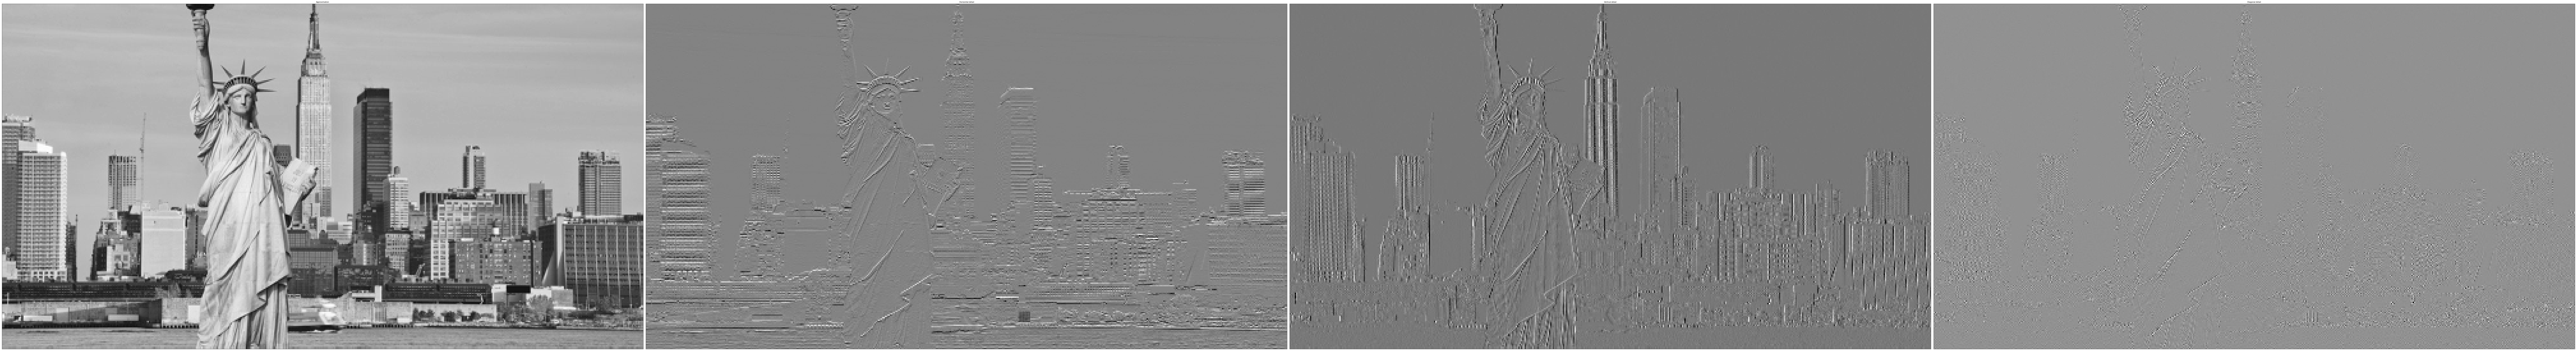

In [161]:
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
y = np.float32(y)

coeffs2 = pywt.dwt2(y, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(200, 560))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [2]:
PATH=r"G:\Documents\ct\dicom_dir\ID_0000_AGE_0060_CONTRAST_1_CT.dcm"

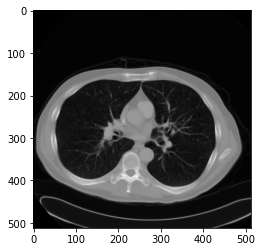

In [4]:
'''def make_lut_u():
    return np.array([[[i,255-i,0] for i in range(256)]],dtype=np.uint8)

def make_lut_v():
    return np.array([[[0,255-i,i] for i in range(256)]],dtype=np.uint8)


imArray = cv.imread(PATH)

img_yuv = cv.cvtColor(imArray, cv.COLOR_BGR2YUV)
y, u, v = cv.split(img_yuv)'''

from pydicom import dcmread
import matplotlib.pyplot as plt
IMG_PATH=r"G:\Documents\ct\wavelets\dicom_dir\ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
ds = dcmread(IMG_PATH)
y = ds.pixel_array
plt.imshow(y, cmap="gray")
plt.show()


(512, 512)


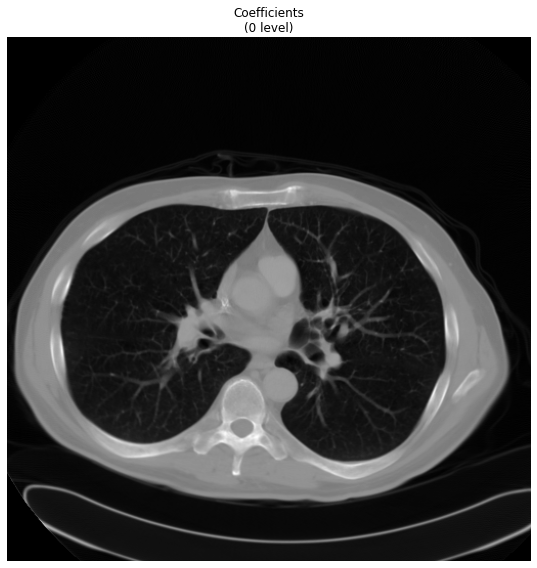

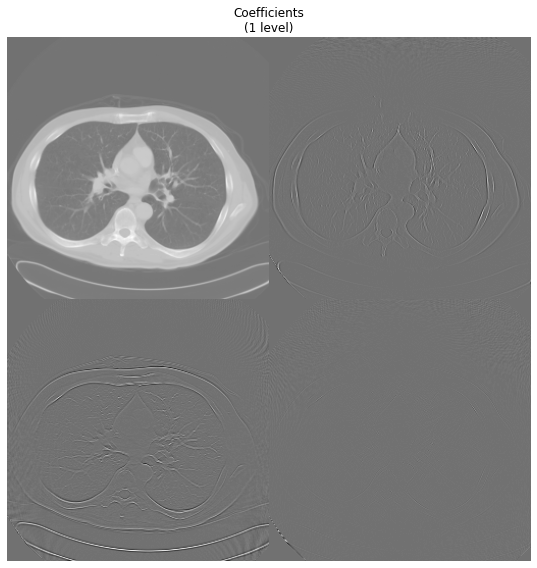

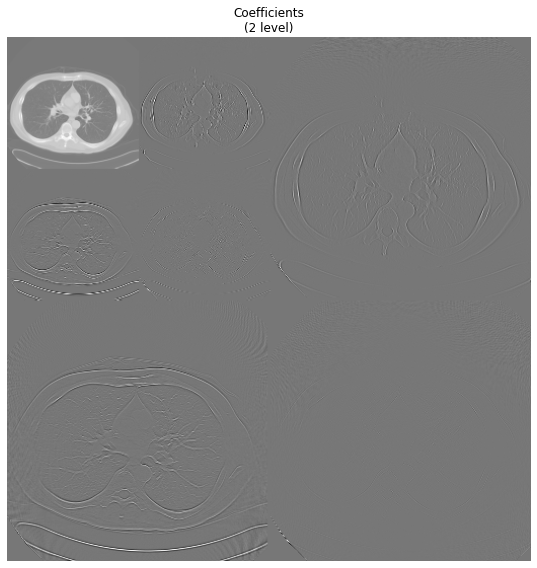

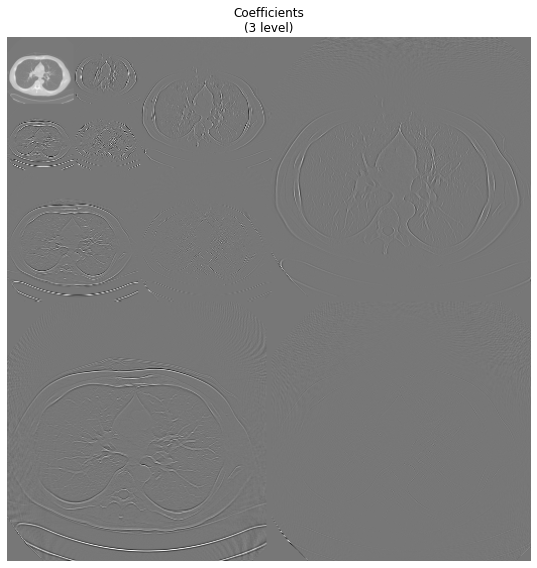

-0.040386356


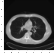

-0.57902664


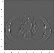

-0.7552986


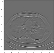

-0.7814902


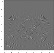

-0.8753103


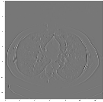

-0.62954


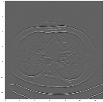

-0.42245457


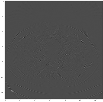

In [12]:
shape = y.shape
print(shape)
MAX_LEVLS = 4
y = np.float32(y)
#u = np.float32(u)
#v = np.float32(v)
channels = [y]#,u,v]
res = []
index = 0
for channel in channels:
    resolutions = []
    for level in range(MAX_LEVLS):
        figure, axes = plt.subplots(figsize=[14, 8])
        c = pywt.wavedec2(channel, 'db2', level=level)
        c[0] /= np.abs(c[0]).max()
        for detail_level in range(level):
            c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
        arr, slices = pywt.coeffs_to_array(c)
        arrPxl, slicesPxl = pywt.coeffs_to_array(c)
        if (level == 3):
            res.append(arrPxl[ slicesPxl[0] ])
            resolutions.append(arrPxl[ slicesPxl[0] ])                
            resolutions.append(arrPxl[ slicesPxl[1]['ad'] ])
            resolutions.append(arrPxl[ slicesPxl[1]['da'] ])
            resolutions.append(arrPxl[ slicesPxl[1]['dd'] ])
            resolutions.append(arrPxl[ slicesPxl[2]['ad'] ])
            resolutions.append(arrPxl[ slicesPxl[2]['da'] ])
            resolutions.append(arrPxl[ slicesPxl[2]['dd'] ])
        axes.imshow(arr, cmap="gray")
        axes.set_title('Coefficients\n({} level)'.format(level))
        axes.set_axis_off()

        plt.tight_layout()
        plt.show()
    index +=1

    #maxRes = cv.cvtColor(maxRes, cv.COLOR_GRAY2BGR)
    for i in resolutions:
        #print(i.shape[0], i.shape[1])
        plt.figure(figsize = (i.shape[0]/10, i.shape[1]/10), dpi=10)
        print(np.min(i))
        plt.imshow(i, cmap="gray")
        plt.show()
        #print('size = {0}'.format(i.size*i.itemsize), "dimensions", i.shape)
    #print(len(maxRes), len(y))

In [16]:
y_ = res[0]

u_ = res[1]
print(u_)
v_ = res[2]
lut_u, lut_v = make_lut_u(), make_lut_v()
#print(len(lut_u),lut_u)

[[0.8692939  0.8524193  0.8524193  ... 0.88177866 0.88177866 0.8839736 ]
 [0.8432241  0.82541984 0.82541984 ... 0.85639673 0.85639673 0.8587125 ]
 [0.83740854 0.82541984 0.82541984 ... 0.8462784  0.8462784  0.84783787]
 ...
 [0.8882174  0.8727864  0.8704285  ... 0.891988   0.89559424 0.90176713]
 [0.8877525  0.8741621  0.8723886  ... 0.89229494 0.8942235  0.89800817]
 [0.8870305  0.8759068  0.8759068  ... 0.8952604  0.8952604  0.8967073 ]]


In [14]:

#maxRes = cv.cvtColor(resolutions[0], cv.COLOR_GRAY2BGR)

        
y_ = cv.cvtColor(res[0], cv.COLOR_GRAY2BGR)
'''u_ = cv.cvtColor(u_, cv.COLOR_GRAY2BGR)
v_ = cv.cvtColor(v_, cv.COLOR_GRAY2BGR)

for i in range(len(y_)):
    for j in range(len(y_[i])):
        for k in range(len(y_[i][j])):
            u_[i][j][k] = int(255*u_[i][j][k])
u_mapped = np.zeros(u_.shape)
for i in range(len(y_)):
    for j in range(len(y_[i])):
        ind = u_[i][j][0]
        u_mapped[i,j]=lut_u[0][int(ind)]
        #print(lut_u[0][int(ind)])  
v_mapped = np.zeros(u_.shape)
for i in range(len(y_)):
    for j in range(len(y_[i])):
        ind = v_[i][j][0]
        v_mapped[i,j]=lut_v[0][int(ind)]
#u_mapped = cv.LUT(u_, lut_u)
#v_mapped = cv.LUT(v, lut_v)'''

cv.imshow("Merged1", y_)
'''cv.imshow("Merged2", u_)
cv.imshow("Merged3", v_)'''
cv.waitKey(0)
cv.destroyAllWindows()

'''merged = cv.merge([y_,u_,v_])
merged = cv.cvtColor(merged, cv.COLOR_YUV2BGR)'''
'''cv.imshow("Merged1", y_)
cv.imshow("Merged2", u_)
cv.imshow("Merged3", v_)
cv.waitKey(0)
cv.destroyAllWindows()

plt.imshow(y_ )
plt.show()
plt.imshow(u_)
plt.show()
plt.imshow(v_)
plt.show()
'''


'cv.imshow("Merged1", y_)\ncv.imshow("Merged2", u_)\ncv.imshow("Merged3", v_)\ncv.waitKey(0)\ncv.destroyAllWindows()\n\nplt.imshow(y_ )\nplt.show()\nplt.imshow(u_)\nplt.show()\nplt.imshow(v_)\nplt.show()\n'

In [42]:

'''sl = ['aad', 'ada', 'daa', 'add', 'dad', 'dda', 'ddd']
print(shape)'''
#u_res= u
#v_res = v
#uk = np.float32(u_res)
#vk = np.float32(v_res)

#MAX_LEVLS = 3
#c = pywt.wavedecn(uk, 'db2',mode='periodization', level=2)
'''for i in range(len(c[0])):
    norm = np.linalg.norm(c[0][i])
    c[0][i] = c[0][i]/norm
for i in c[1]:
    for j in range(len( c[1][i] )):
        for k in range(len(c[1][i][j])):
            norm = np.linalg.norm(c[1][i][j][k])
            c[1][i][j][k] =c[1][i][j][k]/norm'''
#print(c)
#arr, slices = pywt.coeffs_to_array(c)

#c2 = pywt.wavedecn(vk, 'db2',mode='periodization', level=2)
'''for i in range(len(c2[0])):
    norm = np.linalg.norm(c2[0][i])
    c2[0][i] = c2[0][i]/norm
for i in c2[1]:
    for j in range(len( c2[1][i] )):
        for k in range(len(c2[1][i][j])):
            norm = np.linalg.norm(c2[1][i][j][k])
            c2[1][i][j][k] =c2[1][i][j][k]/norm'''
#arr2, slices2 = pywt.coeffs_to_array(c2)
#print(arr[ slices[0] ].shape, arr2[ slices2[0] ].shape)

'for i in range(len(c2[0])):\n    norm = np.linalg.norm(c2[0][i])\n    c2[0][i] = c2[0][i]/norm\nfor i in c2[1]:\n    for j in range(len( c2[1][i] )):\n        for k in range(len(c2[1][i][j])):\n            norm = np.linalg.norm(c2[1][i][j][k])\n            c2[1][i][j][k] =c2[1][i][j][k]/norm'

In [63]:

imArray1 = cv.imread(PATH)

img_yuv1 = cv.cvtColor(imArray1, cv.COLOR_BGR2YUV)
y1, u1, v1 = cv.split(img_yuv)
print(u1[0][0], type(u1[0][0]))
lut_u1, lut_v1 = make_lut_u(), make_lut_v()
y1 = cv.cvtColor(y1, cv.COLOR_GRAY2BGR)
u1 = cv.cvtColor(u1, cv.COLOR_GRAY2BGR)
v1 = cv.cvtColor(v1, cv.COLOR_GRAY2BGR)
print(u1[0])
u_mapped1 = cv.LUT(u1, lut_u1)
v_mapped1 = cv.LUT(v1, lut_v1)
print(u_mapped1)
cv.imshow("Merged3", u_mapped1)
cv.waitKey(0)
cv.destroyAllWindows() 

123 <class 'numpy.uint8'>
[[123 123 123]
 [123 123 123]
 [123 123 123]
 ...
 [128 128 128]
 [128 128 128]
 [128 128 128]]
[[[123 132   0]
  [123 132   0]
  [123 132   0]
  ...
  [128 127   0]
  [128 127   0]
  [128 127   0]]

 [[123 132   0]
  [123 132   0]
  [123 132   0]
  ...
  [128 127   0]
  [128 127   0]
  [128 127   0]]

 [[123 132   0]
  [123 132   0]
  [123 132   0]
  ...
  [128 127   0]
  [128 127   0]
  [128 127   0]]

 ...

 [[130 125   0]
  [130 125   0]
  [130 125   0]
  ...
  [133 122   0]
  [133 122   0]
  [133 122   0]]

 [[130 125   0]
  [130 125   0]
  [130 125   0]
  ...
  [134 121   0]
  [134 121   0]
  [134 121   0]]

 [[130 125   0]
  [130 125   0]
  [130 125   0]
  ...
  [134 121   0]
  [134 121   0]
  [134 121   0]]]


In [14]:
from pydicom import dcmread
import matplotlib.pyplot as plt
import os
IMG_PATH=r"G:\Documents\ct\wavelets\dicom_dir"
arr = os.listdir(IMG_PATH)
for i in arr:
    ds = dcmread(IMG_PATH+'\\'+ i)
    ds = ds.pixel_array
    #print(ds.shape)
#arr = ds.pixel_array
#plt.imshow(arr, cmap="gray")
#plt.show()

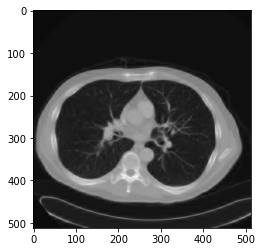

In [30]:
# FALTA ENCODING EN 
#y = np.float32(y)
c = pywt.wavedec2(y, 'db2', level=3)
d = c.copy()
'''c[0] /= np.abs(c[0]).max()
for detail_level in range(3):
    c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
# show the normalized coefficients
arr, slices = pywt.coeffs_to_array(c)'''
# four sublists, the firsts one has the lossless image, d[1] has L3, d[2] has L2 and d[3] has L1
#print(len(d), len(d[0]), len(d[1]))
stepsize = 1.5
import numpy as np
import math
def quantizer(x):
    return np.sign(x) * math.floor(( abs(x) + 0.25*stepsize ) / stepsize )
for i in range(1,4):
    for j in range(len(c[i])):
        for k in range(len(c[i][j])):
            for l in range(len(c[i][j][k])):
                c[i][j][k][l]= quantizer(c[i][j][k][l])
reBuild = pywt.waverec2(c, 'db2')
plt.imshow(reBuild, cmap="gray")
plt.show()

# JPEG

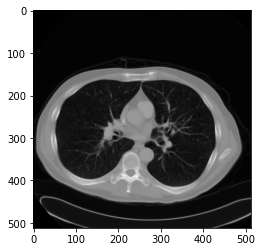

In [35]:
IMG_PATH=r"G:\Documents\ct\wavelets\dicom_dir\ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
image = dcmread(IMG_PATH)
pixelArray = image.pixel_array
#plt.imshow(pixelArray.astype(np.uint8), cmap="gray")

MAX = pixelArray.max()
pixelArrayNorm = pixelArray/MAX
plt.imshow(pixelArrayNorm, cmap="gray", vmin=0, vmax=1)

#np.savetxt(r"G:\Documents\ct\wavelets\ID_0000_AGE_0060_CONTRAST_1_CT.csv", pixelArray, delimiter=",")

In [69]:
quantTable = np.array( [[6,4,4,6,10,16,20,24],[5,5,6,8,10,23,24,22],
[6,5,6,10,16,23,28,22],
[6,7,9,12,20,35,32,25],
[7,9,15,22,27,44,41,31],
[10,14,22,26,32,42,45,37],
[20,26,31,35,41,48,48,40],
[29,37,38,39,45,40,41,40]], np.int8 )
print(quantTable)

[[ 6  4  4  6 10 16 20 24]
 [ 5  5  6  8 10 23 24 22]
 [ 6  5  6 10 16 23 28 22]
 [ 6  7  9 12 20 35 32 25]
 [ 7  9 15 22 27 44 41 31]
 [10 14 22 26 32 42 45 37]
 [20 26 31 35 41 48 48 40]
 [29 37 38 39 45 40 41 40]]


In [70]:
px = 1/plt.rcParams['figure.dpi']  # pixel in inches

In [84]:
class Node:
    def __init__(self, symbol, prob, left=None, right=None):
        self.symbol = symbol
        self.prob = prob
        self.left = left
        self.right = right

class HuffmanEncoder:
    def __init__(self, freqs):
        self.freqs = freqs
        self.codes = {}
        self.tree = []
        
    def preorder(self, node, path=""):
        if node.left == None:
            self.codes[node.symbol] = path
        else:
            self.preorder(node.left, path+"0")
            self.preorder(node.right, path+"1")
    def encode(self):
        self.tree = []
        for i in self.freqs:
            self.tree.append( Node(i[0], i[1]) )
        while len(self.tree)>1:
            left = self.tree.pop(0)
            right = self.tree.pop(0)
            newNode = Node( left.symbol + right.symbol, left.prob+right.prob, left, right )
            self.tree.append(newNode)
            self.tree = sorted( self.tree, key=operator.attrgetter('prob') )
        self.codes = {}
        self.preorder(self.tree[0])
        encoded = ""
        for i in self.freqs:
            encoded = encoded + self.codes[i[0]]
        return encoded
    def viewCodes(self):
        l = []
        for i in self.freqs:
            code = self.codes[i[0]]
            l.append([len(code), i[0], code])
            l.sort()
        for code in l:
            print(code[1],":",code[2])
        

512


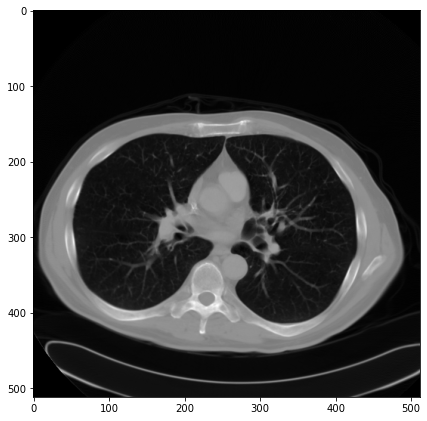

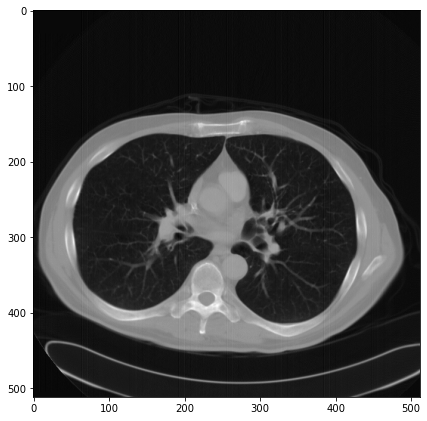

In [88]:
def dct(sourceImg):
    #pixelArray.reshape( (64,64,8,8) )
    preTrans = sourceImg[ :sourceImg.shape[0], :sourceImg.shape[1] 
        ].reshape( (64,64,8,8) )
    trans = fftpack.dctn( preTrans, axes = [2,3], norm='ortho' )
    for i in range(64):
        for j in range(64):
            g = trans[i][j] // quantTable
            trans[i][j] = g
    #trans = trans.clip(min=0)
    #print(trans[14][53].astype(int))
    unique, counts = np.unique(trans, return_counts=True)
    freqs =  np.asarray((unique, counts/626144)).T
    freqs = freqs[np.argsort(freqs[:, 1])]
    Huffman = HuffmanEncoder(freqs)
    compressed = Huffman.encode()
    #Huffman.viewCodes()
    np.savetxt(r"G:\Documents\ct\wavelets\ID_0000_AGE_0060_CONTRAST_1_CT_frequencies.csv",freqs, delimiter=",")
    #print(unique.shape)
    return trans
def idct(trans):
    #de-quantization
    for i in range(64):
        for j in range(64):
            g = (trans[i][j] * quantTable).astype(int)
            trans[i][j] = g
    new = fftpack.idctn(trans, axes = [2,3], norm='ortho').reshape(
        (trans.shape[0]*8, trans.shape[1]*8))
    return new

MAX = pixelArray.max()
'''pixelArrayNorm = pixelArray/MAX''' 
plt.figure(figsize=(512*px,512*px))  
plt.imshow(pixelArray, cmap="gray")#, vmin=0, vmax=1)
trans = dct(pixelArray)
       
#print(trans / quantTable)
new = idct(trans)
plt.figure(figsize=(512*px,512*px))  
plt.imshow(new, cmap="gray")
print(pixelArray - new)

In [8]:
print(trans)

(64, 64, 8, 8)
